In [94]:
from SPCCT_4D import Sample, Timepoint, Viewer, vesselDiameter

# Calling the bunny army
#s1 = Sample("1")
#s2 = Sample("2")
##s3 = Sample("3")
#s4 = Sample("4")
#s5 = Sample("5")
#s6 = Sample("6")

#s7 = Sample("7")
#s8 = Sample("8") 
#s9 = Sample("9")
#s10 = Sample("10")

# Dotarem data (HU)
d1 = Sample("dotarem1")
#d2 = Sample("dotarem2")
d3 = Sample("dotarem3")
#d4 = Sample("dotarem4")
#d5 = Sample("dotarem5")
#d6 = Sample("dotarem6")

Available directories:
0: 2021_01_18.4500.300.2021_01_22.RABJAN00015
1: 2021_01_18.4500.400.2021_01_22.RABJAN00016
2: 2021_01_18.4500.500.2021_01_22.RABJAN00017
3: 2021_01_18.4500.600.2021_01_22.RABJAN00018
4: 2021_01_18.4500.700.2021_01_22.RABJAN00019
Conventional file 1 total DICOM files found: 480
No DICOM files found in D:\copyRaw\Rabbit_AGUIX_dotarem1\2021_01_18.4500.300.2021_01_22.RABJAN00015\Spectral/k_gadolinium.
Conventional file 2 total DICOM files found: 240
No DICOM files found in D:\copyRaw\Rabbit_AGUIX_dotarem1\2021_01_18.4500.400.2021_01_22.RABJAN00016\Spectral/k_gadolinium.
Conventional file 3 total DICOM files found: 240
No DICOM files found in D:\copyRaw\Rabbit_AGUIX_dotarem1\2021_01_18.4500.500.2021_01_22.RABJAN00017\Spectral/k_gadolinium.
Conventional file 4 total DICOM files found: 240
No DICOM files found in D:\copyRaw\Rabbit_AGUIX_dotarem1\2021_01_18.4500.600.2021_01_22.RABJAN00018\Spectral/k_gadolinium.
Conventional file 5 total DICOM files found: 240
No DICOM f

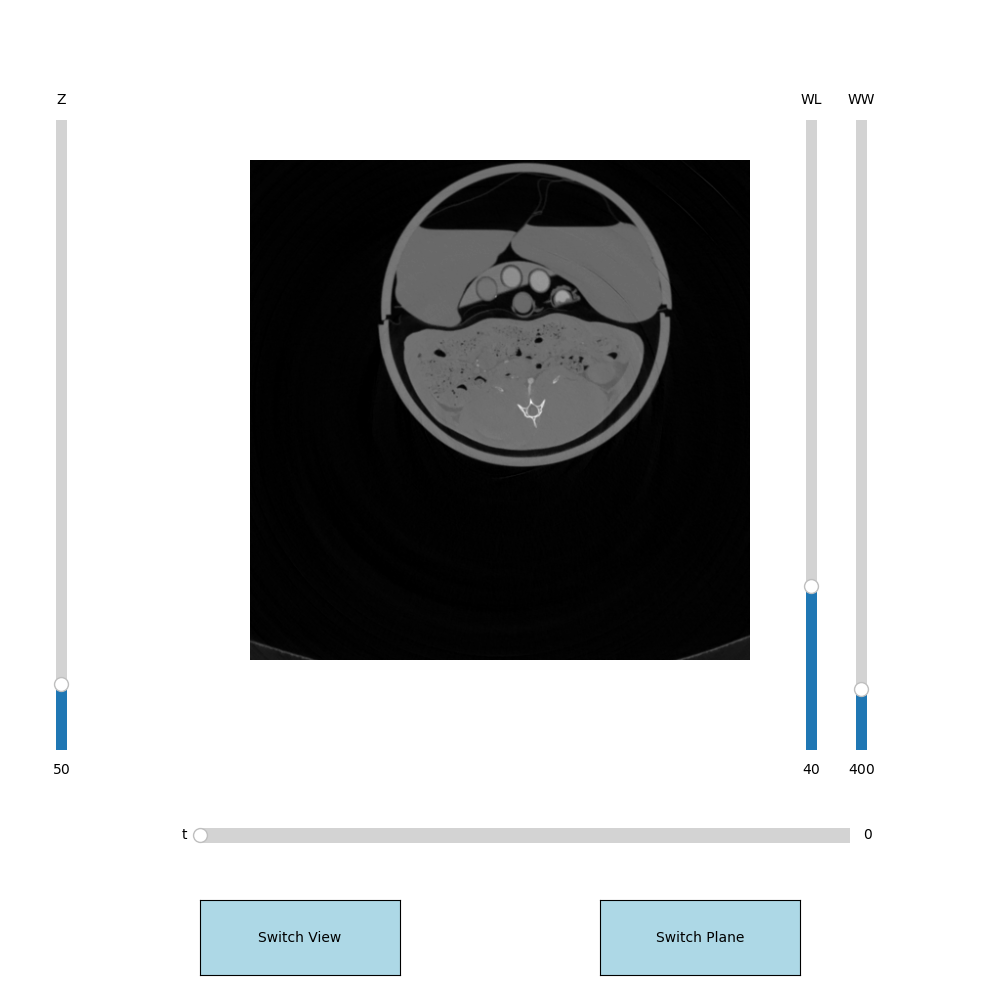

Processing the selection...
113
   Signal_HU   Noise_HU    CNR_HU  Signal_Kedge  Noise_Kedge  CNR_Kedge
0  70.544503  70.356534  0.010132           NaN          NaN        NaN
1  32.122164  -6.382102  0.217597           NaN          NaN        NaN
2  29.535777  -6.735795  0.204738           NaN          NaN        NaN
3  34.811518  -4.400568  0.220713           NaN          NaN        NaN
4  30.998255  -4.061080  0.218125           NaN          NaN        NaN


c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:344: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data], ignore_index=True)


In [102]:
%matplotlib widget
from SPCCT_4D import vesselDiameter, Viewer
#solution =d3
#solution.acquisition[0].conventional = solution.acquisition[1].conventional
#solution.acquisition[2].conventional = solution.acquisition[1].conventional
#solution.acquisition[3].conventional = solution.acquisition[1].conventional
#solution.acquisition[4].conventional = solution.acquisition[1].conventional
vesselDiameter(d1)

In [110]:
%matplotlib widget
from SPCCT_4D import draw2D
import numpy as np
import pandas as pd
from skimage import morphology as MM
def apply2D(self, mask_path, data_point, slice_num):
        # Load the 2D mask
        sample = self
        mask = np.load(mask_path)
        mask =mask[:,:,0]
        mask = MM.erosion(mask, MM.disk(2))
        mask = np.where(mask == 1)
        data = pd.DataFrame(columns=["Mean_HU", "Std_HU", "Median_HU", "Min_HU", "Max_HU", "IQ1_HU", "IQ3_HU", 
                                          "Mean_Kedge", "Std_Kedge", "Median_Kedge", "Min_Kedge", "Max_Kedge", "IQ1_Kedge", "IQ3_Kedge"])

        # Get the corresponding slice of the conventional and kedge data
        conventional_slice = sample.acquisition[data_point].conventional[:, :, slice_num]
        if sample.acquisition[data_point].kedge is not None:
            kedge_slice = sample.acquisition[data_point].kedge[:, :, slice_num]
        else:
            kedge_slice = None

        # Ensure mask dimensions match the slice dimensions
        #if mask.shape != conventional_slice.shape:
        #    raise ValueError("Mask dimensions do not match the slice dimensions")

        # Placeholder for image data, replace with actual image data
        measurements = []

        # Compute statistics for the circular ROI
        for i in range(len(sample.acquisition)):
            conventional = sample.acquisition[i].conventional[:, :, slice_num]
            kedge = sample.acquisition[i].kedge[:, :, slice_num] if sample.acquisition[i].kedge is not None else None

            mean_HU = np.mean(conventional[mask])
            std_HU = np.std(conventional[mask])
            median_HU = np.median(conventional[mask])
            min_HU = np.min(conventional[mask])
            max_HU = np.max(conventional[mask])
            iq1_HU = np.percentile(conventional[mask], 25)
            iq3_HU = np.percentile(conventional[mask], 75)

            if kedge is None or (isinstance(kedge, np.ndarray) and np.isnan(kedge).any()):
                mean_Kedge, std_Kedge, median_Kedge, min_Kedge, max_Kedge, iq1_Kedge, iq3_Kedge = [np.nan] * 7
            else:
                mean_Kedge = np.mean(kedge[mask])
                std_Kedge = np.std(kedge[mask])
                median_Kedge = np.median(kedge[mask])
                min_Kedge = np.min(kedge[mask])
                max_Kedge = np.max(kedge[mask])
                iq1_Kedge = np.percentile(kedge[mask], 25)
                iq3_Kedge = np.percentile(kedge[mask], 75)

            # Append metrics to the list
            measurements.append([mean_HU, std_HU, median_HU, min_HU, max_HU, iq1_HU, iq3_HU,
                                 mean_Kedge, std_Kedge, median_Kedge, min_Kedge, max_Kedge, iq1_Kedge, iq3_Kedge])

        # Convert measurements list to a DataFrame and append it to self.data
        new_data = pd.DataFrame(measurements, columns=data.columns)
        data = pd.concat([data, new_data], ignore_index=True)
        print(data)
        data.to_csv("dataframe.csv", index=False)
#solution = d1
#solution.acquisition[1].conventional = solution.acquisition[0].conventional
#solution.acquisition[2].conventional = solution.acquisition[0].conventional
#solution.acquisition[3].conventional = solution.acquisition[0].conventional
#solution.acquisition[4].conventional = solution.acquisition[0].conventional
apply2D(d3, "Kidney_Masks/r_cortex_d3_260_t2.npy", 1,  260)

      Mean_HU     Std_HU  Median_HU  Min_HU  Max_HU  IQ1_HU  IQ3_HU  \
0  148.456522  16.003677      145.5   120.0   189.0   136.0  160.75   
1  148.456522  16.003677      145.5   120.0   189.0   136.0  160.75   
2  148.456522  16.003677      145.5   120.0   189.0   136.0  160.75   
3  148.456522  16.003677      145.5   120.0   189.0   136.0  160.75   
4  148.456522  16.003677      145.5   120.0   189.0   136.0  160.75   

   Mean_Kedge  Std_Kedge  Median_Kedge  Min_Kedge  Max_Kedge  IQ1_Kedge  \
0         NaN        NaN           NaN        NaN        NaN        NaN   
1         NaN        NaN           NaN        NaN        NaN        NaN   
2         NaN        NaN           NaN        NaN        NaN        NaN   
3         NaN        NaN           NaN        NaN        NaN        NaN   
4         NaN        NaN           NaN        NaN        NaN        NaN   

   IQ3_Kedge  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


C:\Users\Chris\AppData\Local\Temp\ipykernel_17412\544175362.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, new_data], ignore_index=True)


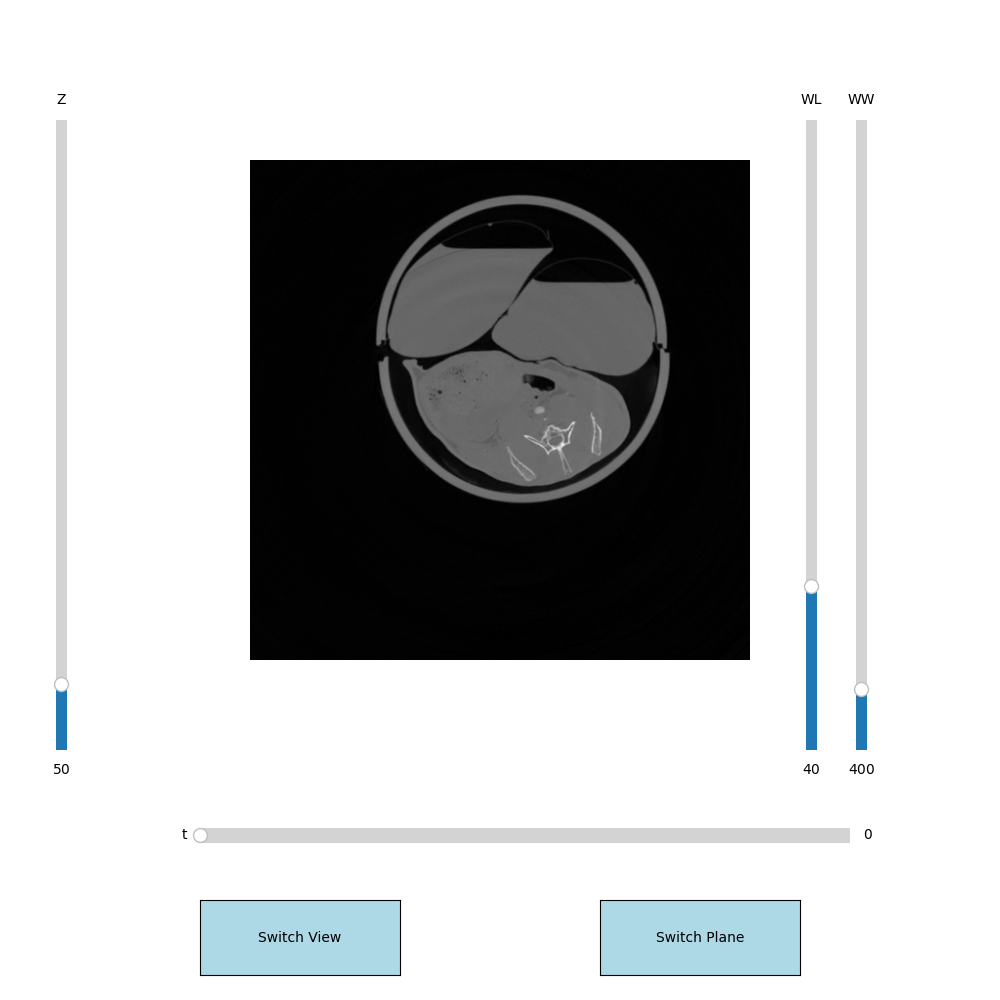

c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:40: SyntaxWarning: invalid escape sequence '\c'
  base_path = f"D:\copyRaw\Rabbit_AGUIX_" + rabbit_id


IndexError: arrays used as indices must be of integer (or boolean) type

In [2]:
%matplotlib widget
from SPCCT_4D import draw2D

aqui_estoy_yo = draw2D(d5)
aqui_estoy_yo.apply2D("Kidney_Masks/r_cortex_d5_194_t1.npy", 0,  194)

In [183]:
from skimage import morphology as MM
import pandas as pd
import numpy as np
import nrrd
from SPCCT_4D import Sample, Viewer

def makeItEasy(slices, sample, mask):
    readdata, header = nrrd.read(mask)
    mask_data = np.swapaxes(readdata, 0, 1)

    if slices is None:
        slices = 240  # Default slice count

    # Determine the presence of the mask
    mask_presence = np.any(mask_data == 1, axis=(0, 1))
    first_presence = np.argmax(mask_presence)  # Index of first presence
    last_presence = len(mask_presence) - 1 - np.argmax(mask_presence[::-1])  # Last index where there's data
    print(f"Longeur:{last_presence-first_presence }")
    # Ensure that you do not exceed the number of available slices
    end_slice = min(first_presence + slices, mask_data.shape[2])
    start_slice = first_presence  # Start from the first detected mask presence

    # Adjust mask_data to the calculated slice range
    mask_data = mask_data[:, :, start_slice:end_slice]

    # Apply erosion to the mask
    eroded_mask_data = np.zeros_like(mask_data)
    for i in range(mask_data.shape[2]):
        eroded_mask_data[:, :, i] = MM.erosion(mask_data[:, :, i], MM.disk(2))

    measurements = []
    for acquisition in sample.acquisition:
        conventional = acquisition.conventional

        print(f"Conventional shape before slicing: {conventional.shape}")
        print(f"Expected slice range: {start_slice} to {end_slice}")

        # Ensure conventional data matches the slice range of mask_data
        if conventional.shape[2] < end_slice:
            print(f"Adjusting end_slice from {end_slice} to {conventional.shape[2]}")
            end_slice = conventional.shape[2]

        conventional = conventional[:, :, start_slice:end_slice]

        print(f"Conventional shape after slicing: {conventional.shape}")

        indices = np.where(eroded_mask_data == 1)
         # Check if indices are within bounds
        if np.any(indices[2] >= conventional.shape[2]):
            print(f"Indices out of bounds: max index {np.max(indices[2])}, shape {conventional.shape[2]}")
            valid_mask = indices[2] < conventional.shape[2]
            indices = (indices[0][valid_mask], indices[1][valid_mask], indices[2][valid_mask])

        signal_values = conventional[indices]

        # Calculate desired statistics
        signal_HU_mean = np.mean(signal_values)
        signal_std = np.std(signal_values)
        signal_HU_median = np.median(signal_values)
        signal_HU_min = np.min(signal_values)
        signal_HU_max = np.max(signal_values)
        signal_HU_Q1 = np.percentile(signal_values, 25)
        signal_HU_Q3 = np.percentile(signal_values, 75)

        pixel_volume = 0.5 * 0.5 * 0.5  # Voxel volume in mm³
        volume = np.sum(eroded_mask_data == 1) * pixel_volume
        normalized_signal = signal_HU_mean / volume

        measurements.append({
            "Mean": signal_HU_mean,
            "Std": signal_std,
            "Median": signal_HU_median,
            "Min": signal_HU_min,
            "Max": signal_HU_max,
            "Q1": signal_HU_Q1,
            "Q3": signal_HU_Q3,
            "Volume": volume,
            "Normalized_Signal": normalized_signal
        })

    data = pd.DataFrame(measurements)
    print(data)
    data.to_csv("dataframe.csv", index=False)

    # Update sample data with eroded mask
    for i in range(1, len(sample.acquisition)):
        sample.acquisition[i].conventional = sample.acquisition[i].conventional[eroded_mask_data == 1]

    Viewer(sample)

# Parameters
slices = 240
mask = "D:/3d_masks/ivc_d5_t1.seg.nrrd"
sample = d5
makeItEasy(slices, sample, mask)


Longeur:296
Conventional shape before slicing: (512, 512, 480)
Expected slice range: 94 to 334
Conventional shape after slicing: (512, 512, 240)
Conventional shape before slicing: (512, 512, 240)
Expected slice range: 94 to 334
Adjusting end_slice from 334 to 240
Conventional shape after slicing: (512, 512, 146)
Indices out of bounds: max index 239, shape 146
Conventional shape before slicing: (512, 512, 240)
Expected slice range: 94 to 240
Conventional shape after slicing: (512, 512, 146)
Indices out of bounds: max index 239, shape 146
Conventional shape before slicing: (512, 512, 240)
Expected slice range: 94 to 240
Conventional shape after slicing: (512, 512, 146)
Indices out of bounds: max index 239, shape 146
Conventional shape before slicing: (512, 512, 240)
Expected slice range: 94 to 240
Conventional shape after slicing: (512, 512, 146)
Indices out of bounds: max index 239, shape 146
        Mean        Std  Median   Min    Max    Q1    Q3   Volume  \
0  46.429463  20.030011   

PermissionError: [Errno 13] Permission denied: 'dataframe.csv'

In [141]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt

def load_and_inspect_mask(mask_path):
    readdata, header = nrrd.read(mask_path)
    mask_data = np.swapaxes(readdata, 0, 1)
    
    # Print shape of mask_data
    print(f"Mask data shape: {mask_data.shape}")
    
    return mask_data

# Path to the mask
mask_path = "D:/3d_masks/r_d5_t2.seg.nrrd"
mask_data = load_and_inspect_mask(mask_path)


Mask data shape: (512, 512, 240)


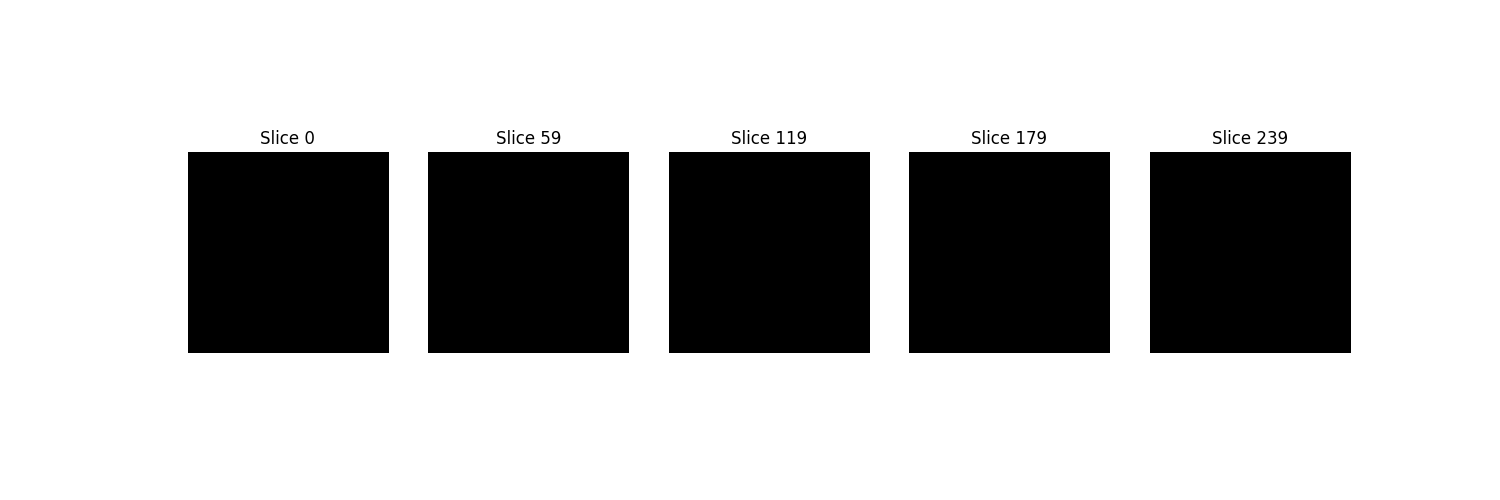

In [142]:
def plot_mask_slices(mask_data, num_slices=5):
    # Get the total number of slices
    total_slices = mask_data.shape[2]
    
    # Select some slices to visualize
    slice_indices = np.linspace(0, total_slices - 1, num_slices, dtype=int)
    
    # Plot the selected slices
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(mask_data[:, :, slice_indices[i]], cmap='gray')
        ax.set_title(f'Slice {slice_indices[i]}')
        ax.axis('off')
    plt.show()

plot_mask_slices(mask_data)


In [143]:
import matplotlib.pyplot as plt

def apply_mask_to_image(image, mask):
    # Ensure the image and mask have the same shape
    assert image.shape == mask.shape, "Image and mask must have the same shape"
    
    # Apply the mask to the image
    masked_image = np.copy(image)
    masked_image[mask == 0] = 0  # Set pixels outside the mask to zero
    
    return masked_image

def plot_image_and_mask(image, mask, masked_image, slice_index):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(image[:, :, slice_index], cmap='gray')
    axes[0].set_title(f'Original Image - Slice {slice_index}')
    axes[0].axis('off')
    
    axes[1].imshow(mask[:, :, slice_index], cmap='gray')
    axes[1].set_title(f'Mask - Slice {slice_index}')
    axes[1].axis('off')
    
    axes[2].imshow(masked_image[:, :, slice_index], cmap='gray')
    axes[2].set_title(f'Masked Image - Slice {slice_index}')
    axes[2].axis('off')
    
    plt.show()

# Sample image (for demonstration purposes, using a random image)
sample_image = d3.acquisition[1].conventional


# Apply the mask to the sample image
masked_image = apply_mask_to_image(sample_image, mask_data)

# Plot the original image, mask, and masked image for a middle slice
slice_index = mask_data.shape[2] // 2
plot_image_and_mask(sample_image, mask_data, masked_image, slice_index)


AssertionError: Image and mask must have the same shape

In [147]:
print(d3.acquisition[1].conventional.shape)

(512, 512, 480)


(512, 512, 240)


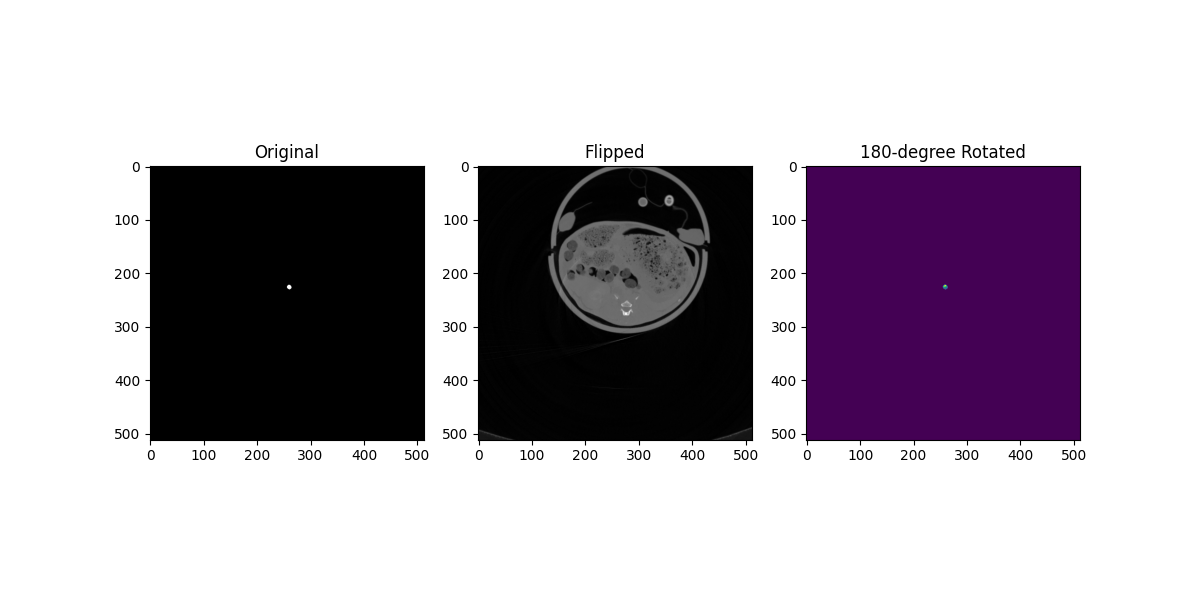

48.56799768518518
45.26357145659374


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import nrrd

# Load your data
readdata, header = nrrd.read("D:/3d_masks/ivc_d6.seg.nrrd")
sampview = d6
# Flip both the x and y axes to mimic a 180-degree rotation about the z-axis
flipped_data = np.swapaxes(readdata, 0, 1)
print(flipped_data.shape)

# Plot to compare
plt.figure(figsize=(12, 6))
n = 209
plt.subplot(1, 3, 1)
plt.imshow(flipped_data[:, :, n], cmap='gray')  # Change slice index as necessary
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(sampview.acquisition[2].conventional[:, :, n], cmap='gray')
plt.title("Flipped")

indices = np.where(flipped_data == 1)
#indices = indices[240:]

plt.subplot(1, 3, 3)
plt.imshow(flipped_data[:,:,n]*sampview.acquisition[2].conventional[:, :, n])
plt.title("180-degree Rotated")

plt.show()
    

print(np.mean(sampview.acquisition[3].conventional[indices]))
print(np.std(sampview.acquisition[3].conventional[indices]))


Available directories:
0: 2021_01_29.4572.300.2024_03_25.AGUIX_Rabbit_26361_a00000
1: 2021_01_29.4572.400.2024_03_25.AGUIX_Rabbit_26361_a00001
2: 2021_01_29.4572.500.2024_03_25.AGUIX_Rabbit_26361_a00002
3: 2021_01_29.4572.600.2024_03_25.AGUIX_Rabbit_26361_a00003
4: 2021_01_29.4572.700.2024_03_25.AGUIX_Rabbit_26361_a00004
Conventional file 1 total DICOM files found: 480
Spectral/k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral/k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral/k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral/k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral/k_gadolinium file 5 total DICOM files found: 480


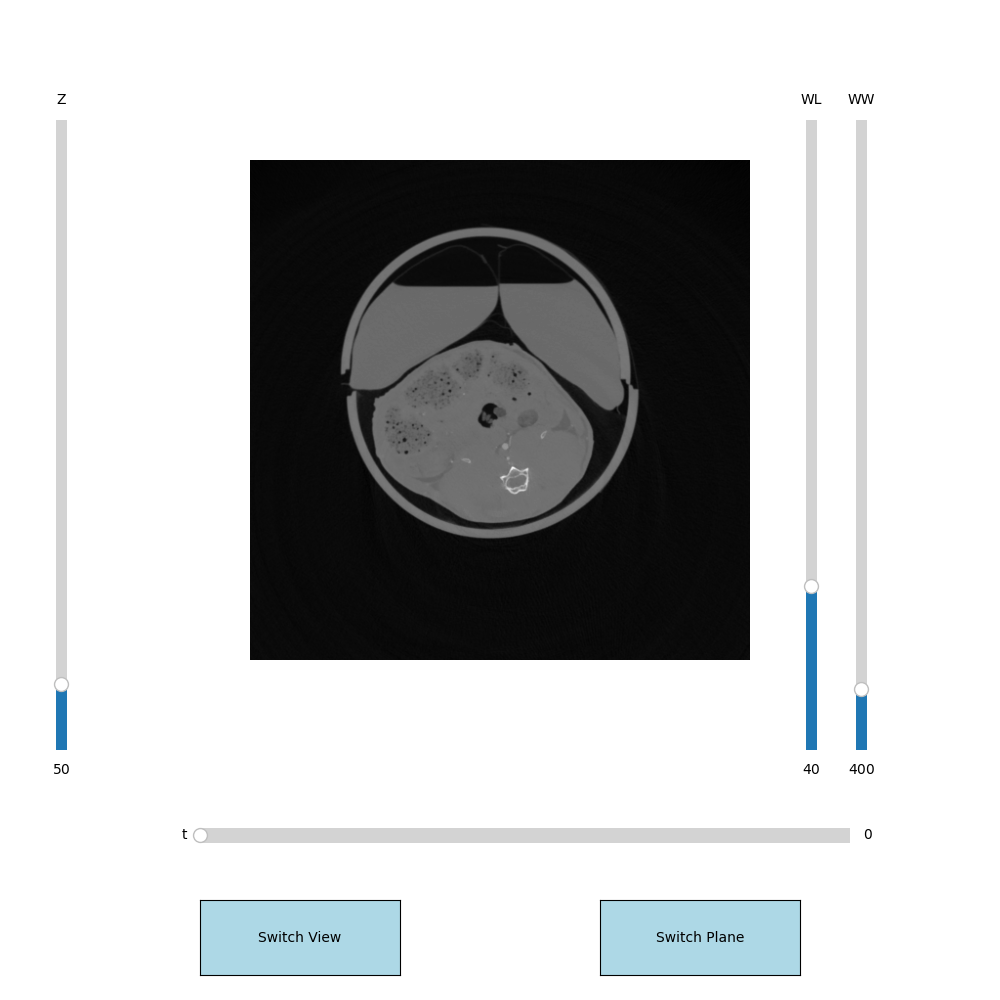

   Signal_HU   Noise_HU  Signal_std    CNR_HU  Signal_Kedge  Noise_Kedge  \
0 -90.631579 -89.311111    7.392817 -0.197989      0.064211     0.072889   
1 -77.842105 -54.311111   23.104484 -0.431593      0.117895     0.087556   
2 -88.263158 -49.088889   20.057397 -0.697415      0.012632     0.010222   
3 -74.473684 -38.866667   24.055568 -0.774069      0.122105     0.134667   
4 -79.842105 -52.044444   31.699681 -0.513315      0.030526     0.027556   

   Kedge_std  CNR_Kedge  
0   0.019006  -0.418784  
1   0.052272   0.408491  
2   0.016171   0.175329  
3   0.041496  -0.131228  
4   0.027043   0.072178  


c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:471: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data], ignore_index=True)


In [11]:
%matplotlib widget
from SPCCT_4D import Sample, Timepoint, Viewer,VesselAnalyzer, vesselDiameter
echantillon = Sample("10")
VesselAnalyzer(echantillon)

In [1]:
%matplotlib widget
from SPCCT_4D import Sample, Viewer, vesselDiameter
sample = Sample("1")

Available directories:
0: 2021_01_25.4531.300.2024_03_17.AGUIX_Rabbit_26201_h00000
1: 2021_01_25.4531.400.2024_03_15.AGUIX_Rabbit_26201_f00001
2: 2021_01_25.4531.500.2024_03_15.AGUIX_Rabbit_26201_f00002
3: 2021_01_25.4531.600.2024_03_15.AGUIX_Rabbit_26201_f00003
4: 2021_01_25.4531.700.2024_03_15.AGUIX_Rabbit_26201_f00004
Conventional file 1 total DICOM files found: 480
Spectral/k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral/k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral/k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral/k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral/k_gadolinium file 5 total DICOM files found: 480


In [ ]:
vesselDiameter(sample)

Available directories:
0: 2021_01_25.4531.300.2024_03_17.AGUIX_Rabbit_26201_h00000
1: 2021_01_25.4531.400.2024_03_15.AGUIX_Rabbit_26201_f00001
2: 2021_01_25.4531.500.2024_03_15.AGUIX_Rabbit_26201_f00002
3: 2021_01_25.4531.600.2024_03_15.AGUIX_Rabbit_26201_f00003
4: 2021_01_25.4531.700.2024_03_15.AGUIX_Rabbit_26201_f00004
Conventional file 1 total DICOM files found: 480
Spectral/k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral/k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral/k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral/k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral/k_gadolinium file 5 total DICOM files found: 480
Mask data shape after filtering: (512, 512, 438)
(438,)
6.324555320336759
9.797958971132712
7.577736953646617
1.3144971134766674
10.0
6.0


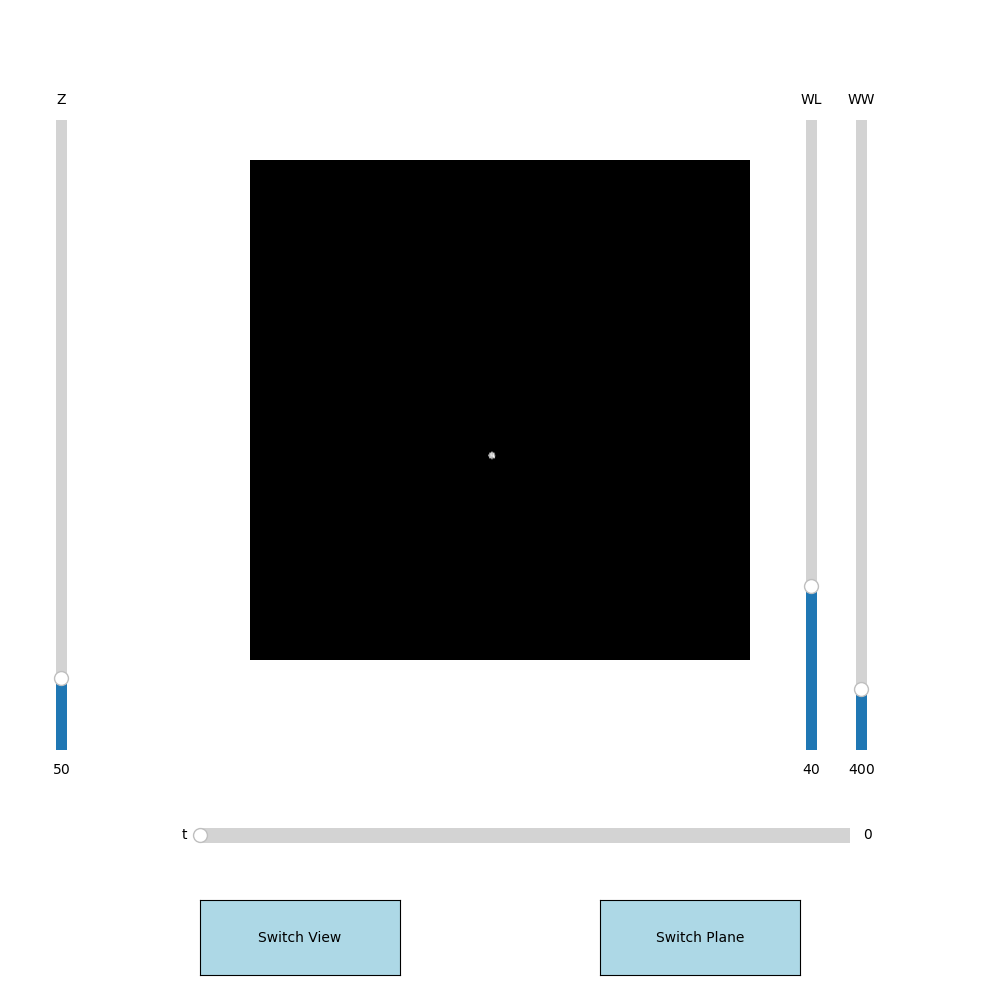

In [3]:
#Viewer(s2)
%matplotlib widget
import nrrd
import numpy as np
import scipy.ndimage as ndi
ready3d = Sample("1") 
readdata, header = nrrd.read("D:/3d_masks/kedge_aorta_s1.seg.nrrd")
readdata = np.swapaxes(readdata, 0, 1)

presence = np.any(readdata == 1, axis=(0, 1))
readdata = readdata[:, :, presence]  # Filter mask data to only include relevant slices
print("Mask data shape after filtering:", readdata.shape)

for i in range(0,5):
    if ready3d.acquisition[i].conventional.shape[2] > presence.shape[0]:
        # Ensure the acquisition data has enough slices to match the mask data slice count
        ready3d.acquisition[i].conventional = ready3d.acquisition[i].conventional[:, :, presence]
        ready3d.acquisition[i].kedge = ready3d.acquisition[i].kedge[:, :, presence]
        
    ready3d.acquisition[i].conventional = readdata*ready3d.acquisition[i].conventional[:,:,presence]
    ready3d.acquisition[i].kedge = readdata*ready3d.acquisition[i].kedge[:,:,presence]
    # Apply the same slicing to the image acquisition data

#ready3d.acquisition[1].conventional = readdata*ready3d.acquisition[1].conventional

diameters = 2*np.max(ndi.distance_transform_edt(readdata), axis = (0,1))
indices = np.where(ndi.distance_transform_edt(diameters) > 0.5)
diameters = diameters[indices]
print(diameters.shape)
diameters = diameters[0:240]
print(diameters[0])
print(diameters[239])
print(np.mean(diameters))
print(np.std(diameters))
print(max(diameters))
print(min(diameters))
Viewer(ready3d)

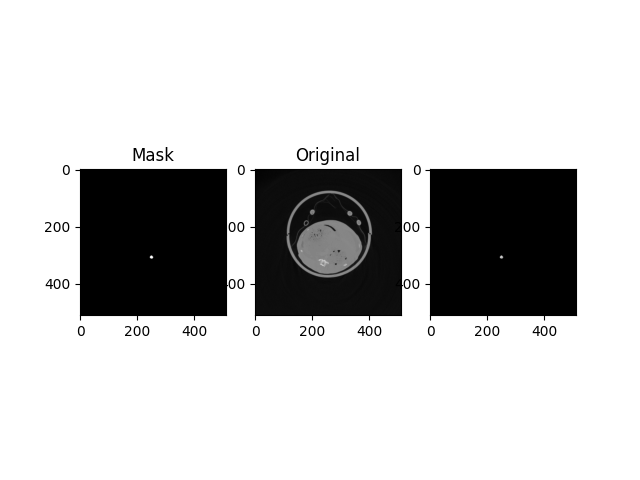

In [3]:
from SPCCT_4D import vesselDiameter
%matplotlib widget
import matplotlib.pyplot as plt
import nrrd
import numpy as np
#s5 = Sample("5")
samp = s1
readdata, header = nrrd.read("D:/3d_masks/aorta_s1.seg.nrrd")
readdata = np.swapaxes(readdata, 0 , 1)
# Clear the current figure (if any) to start fresh
plt.clf()
# Create a subplot for the mask
plt.subplot(1, 3, 1)
plt.imshow(readdata[:, :, 450], cmap='gray')  # Assuming the slice index 250 is correct
plt.title("Mask")

# Create a subplot for the original image
plt.subplot(1, 3, 2)
plt.imshow(s1.acquisition[1].conventional[:, :, 450], cmap='gray')  # Ensure the index is correctly aligned with your data
plt.title("Original")


plt.subplot(1,3,3)
plt.imshow(readdata[:, :, 450]*samp.acquisition[1].conventional[:, :, 450], cmap = 'gray')
# Show the plots
plt.show()
#plt.clf()
#samp.acquisition[1].conventional = readdata*s1.acquisition[1].conventional
#Viewer(samp)
#samp.acquisition[0].conventional[:,:,0:239] = samp.acquisition[0].conventional[:,:,240:479]
#samp.acquisition[0].conventional = samp.acquisition[0].conventional[:,:,0:239]

# Load previously made mask to evaluate quality
#vesselDiameter(samp, "Masks\\IVC_s4_292_t1.npy")
#vesselDiameter(samp, "Vessel_Masks\\SAA_d5_167.npy")
#vesselDiameter(samp, "Kidney_Masks\\r_cortex_d5_41.npy")

#vesselDiameter(samp, "D:/3d_masks/aorta_s1.seg.nrrd")


Available directories:
0: 2021_01_25.4537.300.2024_03_18.AGUIX_Rabbit_26285_b00000
1: 2021_01_25.4537.400.2024_03_16.AGUIX_Rabbit_26285_a00001
2: 2021_01_25.4537.500.2024_03_16.AGUIX_Rabbit_26285_a00002
3: 2021_01_25.4537.600.2024_03_16.AGUIX_Rabbit_26285_a00003
4: 2021_01_25.4537.700.2024_03_16.AGUIX_Rabbit_26285_a00004
Conventional file 1 total DICOM files found: 480
Spectral/k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral/k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral/k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral/k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral/k_gadolinium file 5 total DICOM files found: 480


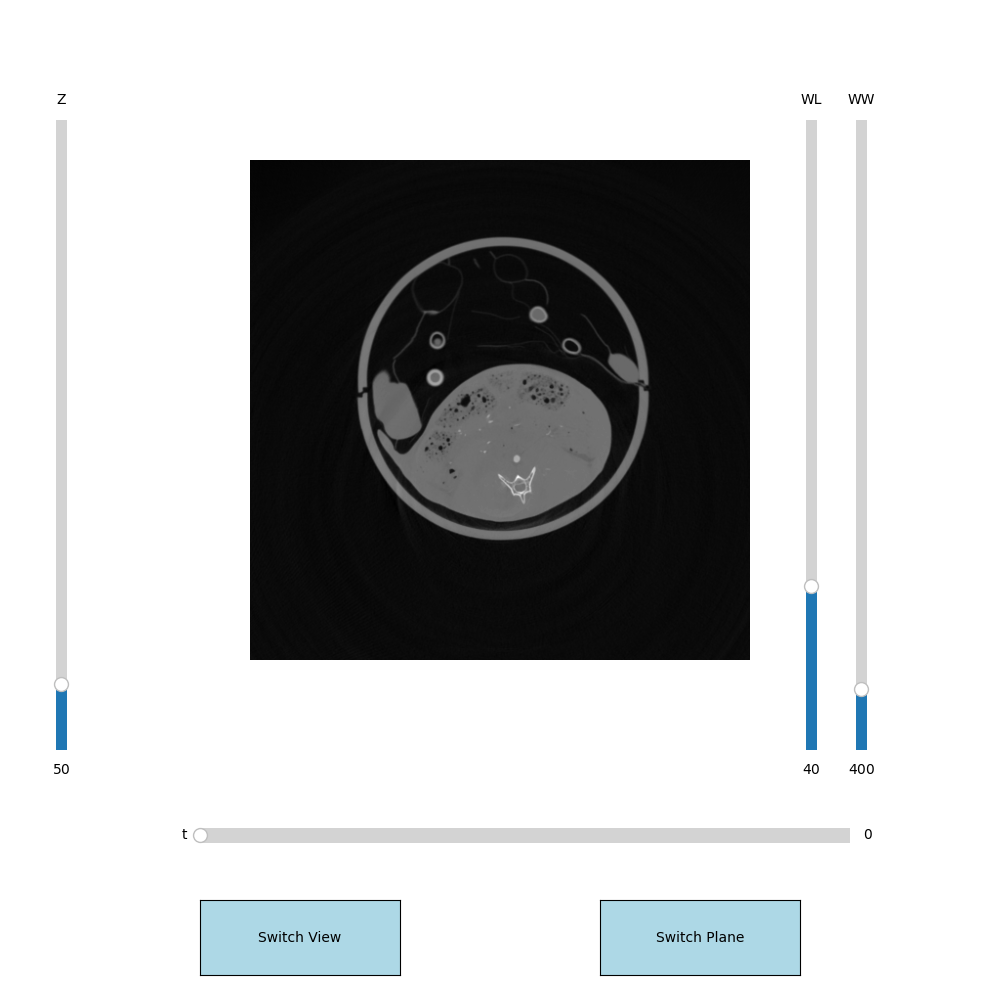

In [1]:

%matplotlib widget
from SPCCT_4D import Viewer, Sample
Viewer(Sample("4"))

Maximum pixel value (mg/mL):3.6600000000000037
Minimum pixel value (mg/mL):7.677149087261718e-86


<Figure size 640x480 with 0 Axes>

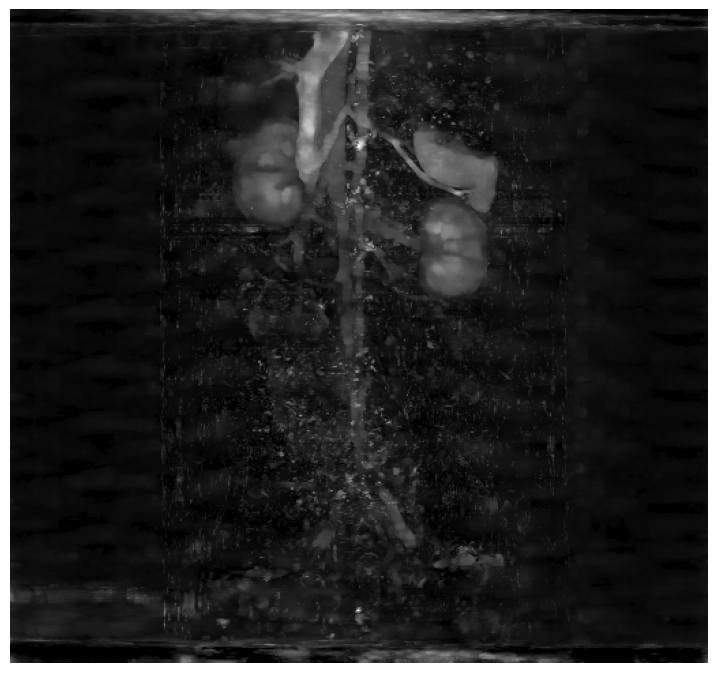

<Figure size 640x480 with 0 Axes>

In [30]:
import SPCCT_4D  # Assuming this is your custom library
import scipy.ndimage as ndi  # You import but do not use this, consider removing if not needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

#Assuming Sample is a function or class that loads image data
#image = SPCCT_4D.Sample("2")

def apply_window(image, level, width):
    lower = level - (width / 2)
    upper = level + (width / 2)
    return np.clip(image, lower, upper)

plt.clf()
plt.figure(figsize=(9, 9))
# Maximum Intensity Projection (MIP)
#plt.subplot(1, 3, 1)

#axial = ndimage.rotate(image.acquisition[0].conventional, 45, axes = (0,1), cval = -100)

#np.any(axial == 0)

#doosy = axial[200:375, :, :]
#mip = np.max(apply_window(doosy, 225, 650), axis = 0)

#print(f"Maximum pixel value (HU):{np.max(doosy)}")
#print(f"Minimum pixel value (HU):{np.min(doosy)}")
#plt.imshow(np.rot90(mip), cmap="gray")

# Mean Intensity Projection
#plt.subplot(1, 3, 2)
thresh = image.acquisition[1].kedge > 0.1

kedge_mip = np.rot90(np.max(ndi.rotate(image.acquisition[1].kedge[205:479,:,:]*thresh[205:479,:,:], 0, axes = (0,1), cval = 0), axis=0))
#kedge_mip = np.rot90(np.max(ndi.rotate(image.acquisition[1].kedge[205:479,:,:], 0, axes = (0,1), cval = 0), axis=0))
plt.imshow(kedge_mip, cmap="gray")

print(f"Maximum pixel value (mg/mL):{np.max(kedge_mip)}")
print(f"Minimum pixel value (mg/mL):{np.min(kedge_mip)}")
plt.axis("off")
plt.show()
plt.savefig("clean_image.pdf", bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

In [169]:
plt.subplot(1,2,1)
plt.imshow(np.max(image.acquisition[0].conventional[200:400, :,:], axis = 0), cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(np.max(image.acquisition[0].kedge[200:400, :,:], axis = 0), cmap = 'gray')

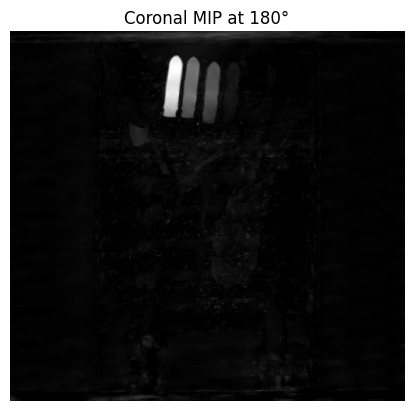

In [24]:
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import imageio

# Example data: Create a random 3D array to simulate a volume
data = image.acquisition[1].kedge
thresh = data < 16  # Dimensions [depth, height, width]
data = data*thresh
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    # Normalize to [0, 1]
    normalized_image = (image - image_min) / (image_max - image_min)
    # Scale to [0, 255]
    scaled_image = (normalized_image * 255).astype(np.uint8)
    return scaled_image

def rotate_and_extract_mip(data, angle, start_depth, end_depth):
    # Rotate the volume around the Y-axis
    
    rotated = ndimage.rotate(data, angle, axes=(0, 1), reshape=False, mode='nearest', cval = 0)
    # Compute MIP over the specified depth range for a coronal slice
    mip = np.rot90(np.max(rotated[ start_depth:end_depth, :, :], axis=0))
    mip = normalize_image(mip)
    return mip

# Parameters for the rotation and MIP extraction
angles = np.linspace(0, 360, num=36)  # Generate 36 frames for a full rotation
start_depth = 250  # Start of the depth range for the MIP
end_depth = 350   # End of the depth range for the MIP

frames = []
for angle in angles:
    frame = rotate_and_extract_mip(data, angle, start_depth, end_depth)
    frames.append(frame)

# Optionally save as a GIF
imageio.mimsave('rotating_coronal_mip.gif', frames, duration=0.1)

# Show one of the frames as an example
plt.imshow(frames[18], cmap='gray')  # Show the frame at 180 degrees
plt.title('Coronal MIP at 180°')
plt.axis('off')
plt.show()



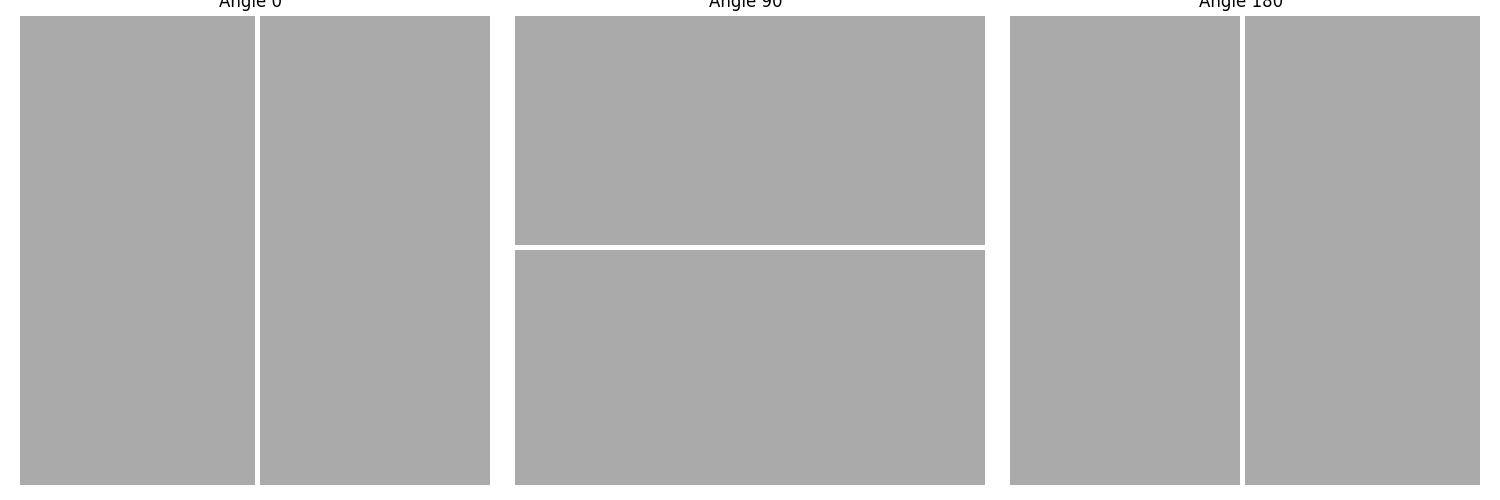

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

# Create a diagnostic volume
data = np.zeros((100, 100, 100))
data[50, :, :] = 1  # Mark the middle slice along depth (Z-axis)
data[:, 50, :] = 2  # Mark the middle slice along height (Y-axis)
data[:, :, 50] = 3  # Mark the middle slice along width (X-axis)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
angles = [0, 90, 180]

# Rotate around what we consider the Y-axis
for i, angle in enumerate(angles):
    rotated = ndimage.rotate(data, angle, axes=(0, 2), reshape=False)
    # Displaying the slice along the Y-axis to view rotation effects on X and Z
    axs[i].imshow(rotated[:, 50, :], cmap='gray', vmin=0, vmax=3)
    axs[i].set_title(f'Angle {angle}°')
    axs[i].axis('off')

plt.tight_layout()
plt.show()


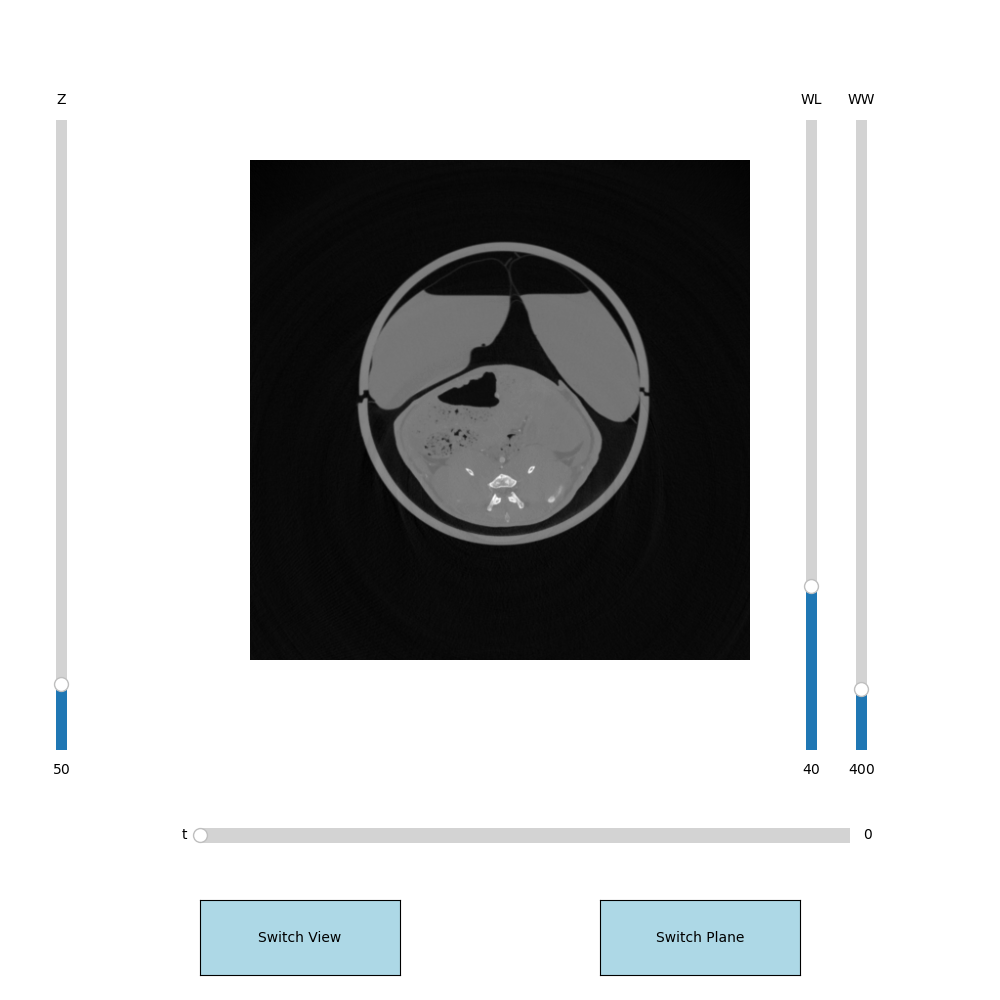

Processing the selection...
275
    Signal_HU    Noise_HU    CNR_HU  Signal_Kedge  Noise_Kedge  CNR_Kedge
0  526.600000  433.962441  0.499447      8.118333     6.701221   0.694570
1   35.000000  -73.676056  0.434113      0.000000     0.013803  -0.226383
2    6.133333 -109.286385  0.422331      0.002333     0.018122  -0.196607
3   22.816667 -108.624413  0.453326      0.000000     0.000188  -0.068680
4  -33.316667 -214.882629  0.475843      0.010333     0.001784   0.503862


c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:335: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data], ignore_index=True)


In [178]:
vesselDiameter(image)